# ECE1508: Applied Deep Learning
# Assignment 1
## Liu, Shawn

In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Try an example

In [ ]:
np.ones(3)

## Programming Question 1

In [ ]:
class LinearMachine():
    def __init__(self):
        # Define weights as attribute
        # Set the initial values randomly

        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(2)
        # ============================================
        pass

    def data_synthesizer(self, dataset_size, velocity_mean, velocity_var,
                         height_mean, height_var):

        # Draw random velocity and height
        # Let the array size to be <dataset_size>
        # Don't forget to make them positive using np.abs()
        
        # ============ COMPLETE HERE ================
        v_sample = np.abs(np.random.normal(velocity_mean,np.sqrt(velocity_var),dataset_size))
        h_sample = np.abs(np.random.normal(height_mean,np.sqrt(height_var),dataset_size))

        # Compute distance d via Newton's law
        d_sample = 0.45*v_sample*np.sqrt(h_sample)
        # ============================================

        # Make the dataset
        # ============ COMPLETE HERE ================
        dataset = np.column_stack((v_sample,h_sample)),d_sample
        return dataset
        # ============================================
        pass

    def train_GD(self, dataset, lr, delta = float("inf"), max_iterations = 1e12):

        # We can reset the weights to some initial random values
        # ============ COMPLETE HERE ================
        self._weights = np.random.randn(2)
        # ============================================

        # read data-points and labels
        # ============ COMPLETE HERE ================
        x = dataset[0]
        y = dataset[1]
        # ============================================

        # Count number of iterations to stop after max iterations
        counter = 0

        # Initiate risk
        risk = 0

        while delta > 0 and counter < max_iterations:
            
            # Compute Gradient
            # ============ COMPLETE HERE ================
            predictions = np.dot(x, self._weights)
            error = predictions-y
            grad1 = (2 / len(y)) * np.dot(error,x[:, 0])
            grad2 = (2 / len(y)) * np.dot(error,x[:, 1])
            # ============================================

            # Save risk at current weights
            # ============ COMPLETE HERE ================
            old_risk =risk
            # ============================================

            # Update weights using GD with learning rate lr
            # ============ COMPLETE HERE ================
            self._weights[0] = self._weights[0] - lr * grad1
            self._weights[1] = self._weights[1] - lr * grad2
            # ============================================

            # Compute new risk
            # ============ COMPLETE HERE ================
            risk = np.mean(error ** 2)
            # ============================================

            # Update stopping criteria
            delta = np.abs(risk - old_risk)
            counter += 1

        # Print out if the code stops due to max iterations, i.e., GD did not converge
        if counter == max_iterations:
            print(f"GD dos not converge: train_GD hit max iterations = {max_iterations}!")

        return risk
    

    def train(self, dataset):
          # Find the minimizer
          # ============ COMPLETE HERE ================
          x = dataset[0]
          y = dataset[1]
          self._weights = np.linalg.inv(x.T @ x) @ x.T @ y
          # ============================================


          # Compute minimum risk
          # ============ COMPLETE HERE ================
          predictions = np.dot(x,self._weights)
          error = predictions-y
          risk_opt = np.mean(error ** 2) 
          # ============================================
          return risk_opt

    def test(self, J, velocity_mean, velocity_var, height_mean, height_var):
          
          # Generate an independent dataset for test
          # ============ COMPLETE HERE ================
          dataset = self.data_synthesizer(J, velocity_mean, velocity_var, height_mean, height_var) 
          x = dataset[0] 
          y = dataset[1]  
          # ============================================

          # Compute the risk via the trained weights
          # ============ COMPLETE HERE ================
          predictions = np.dot(x,self._weights)
          error = predictions - y
          # ============================================

          # Compute test risk
          # ============ COMPLETE HERE ================
          risk_test = np.mean(error ** 2)
          # ============================================
          return risk_test

### Gradient Descent vs Optimal Training

/var/folders/r8/21q41sb91w1bbqmwddz5q4740000gn/T/ipykernel_23589/1870265985.py:79: RuntimeWarning: invalid value encountered in scalar subtract
  delta = np.abs(risk - old_risk)


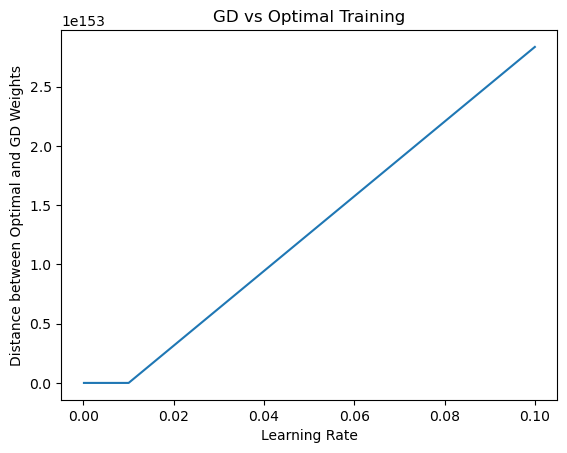

In [15]:
def Optimality_Gap(lr_list):
    myModel = LinearMachine()
    dataset = myModel.data_synthesizer(100, 1, 5, 3, 3)

    # Initiate optimality gap vector
    Opt_gap = []

    # Find optimal weights
    myModel.train(dataset)
    weights_optimal = myModel._weights

    # Find GD trained weights 
    for lr in lr_list:
        # ============ COMPLETE HERE ================
        myModel.train_GD(dataset, lr) 
        weights_GD =myModel._weights
        # ============================================

        # Append the optimality gap 
        Opt_gap.append(np.linalg.norm(weights_optimal-weights_GD))


    # Plot 
    plt.figure()
    plt.plot(lr_list, Opt_gap)
    plt.title('GD vs Optimal Training')
    plt.xlabel('Learning Rate')
    plt.ylabel('Distance between Optimal and GD Weights')

    plt.show()


# Execute your implementation
Optimality_Gap([0.1, 0.01, 0.001, 0.0001])

### Test Loop

Text(0, 0.5, 'Test Risk')

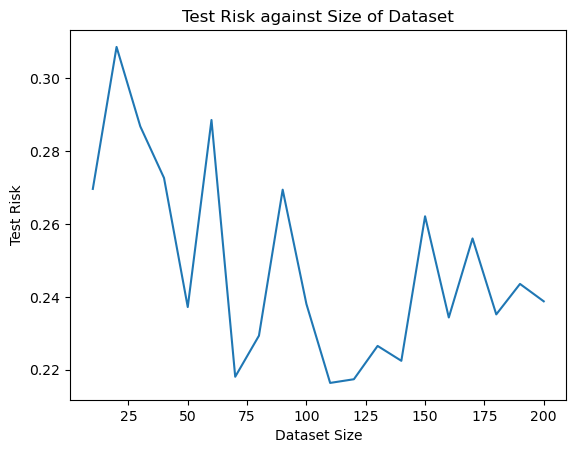

In [17]:
def eval_model(T, I, J, velocity_mean, velocity_var, height_mean, height_var):
  myModel = LinearMachine()
  lr = 0.001
  
  # Initiate the risk 
  emp_risk = 0

  # Loop over t
  for t in range(T):
    # ============ COMPLETE HERE ================
    Dataset=myModel.data_synthesizer(I, velocity_mean, velocity_var, height_mean, height_var)
    myModel.train_GD(Dataset, lr)
    emp_risk += myModel.test(J, velocity_mean, velocity_var, height_mean, height_var)
    # # ============================================
  
  # average rist over datasets
  emp_risk = emp_risk / T

  return emp_risk


# Make list for plot
emp_risk_list = []
T, J = 100, 10

# loop over I
I_list = [10*i for i in range(1,21)]
for I in I_list:
  emp_risk_list.append(eval_model(T, I, J, 1, 5, 3, 3))


# Plot
plt.figure()
plt.plot(I_list, emp_risk_list)
plt.title('Test Risk against Size of Dataset')
plt.xlabel('Dataset Size')
plt.ylabel('Test Risk')


## Programming Question 2

### Perceptron Machine

In [29]:
class PerceptronMachine():
    def __init__(self):
        # define weights as attribute and initiate randomly
        self._dimensions = 9
        # ============ COMPLETE HERE ================
        self.weight = np.random.rand(self._dimensions)
        self.bias = -abs(np.random.rand())
        # ============================================


    def forward(self, datapoint):
        # Affine function
        # ============ COMPLETE HERE ================
        datapoint = np.array(datapoint)
        affine = np.dot(self.weight,datapoint) + self.bias
        # ============================================
        # Activate by step function
        return 1 if affine > 0 else 0

    def train(self, dataset, lr):
        # initiate weights again randomly as we start with training
        # ============ COMPLETE HERE ================
        self.weight = np.random.rand(self._dimensions)  
        self.bias = -abs(np.random.rand() )
        # ============================================

        # initiate error_flag with 1 to get to the while loop
        error_flag = 1

        while error_flag > 0:
            # We initially have no error
            error_flag = 0
            for data in dataset:
                # Read data
                x = data[0]
                label = data[1]

                # Pass it forward
                y = self.forward(x)

                # Implement inner loop
                if y != label:
                    # Find sign(z) 
                    # ============ COMPLETE HERE ================
                    sgn_z = -1 if label == 1 else 1
                    # ============================================

                    # Set movement vector = sgn(z) * x
                    # ============ COMPLETE HERE ================
                    move_vector = sgn_z * x
                    # ============================================

                    # Update
                    # ============ COMPLETE HERE ================
                    self.weight -= lr * move_vector
                    # ============================================

                    # Since we had error, we set the flag 1 again
                    error_flag = 1
            


### X Pattern

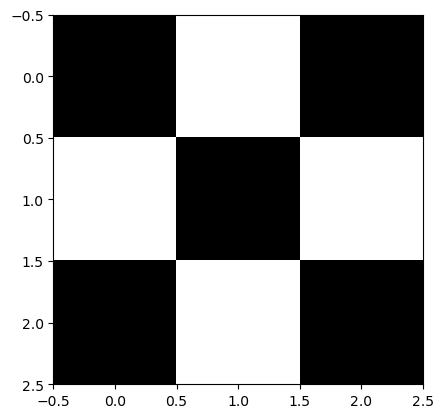

In [30]:
# Generating the X Pattern
# Run this code to see X pattern

x =  256*np.ones([3,3],dtype = int)

for i in range(3):
    x[i,i] = 0
    x[i,2-i] = 0

plt.imshow(x,cmap='gray')

### Generate Dataset and Train

In [36]:
# Generate the Dataset
# Initiate empty dataset
dataset = []
image_list = []

# We have 2^9=512 possibilities: loop over them
for i in range(512): 
    # generate 9-dimensional vector
    # ============ COMPLETE HERE ================
    vector = np.array(list(np.binary_repr(i,width = 9))).astype(int)
    image_list.append(vector)
    # ============================================

    # label the vector
    # ============ COMPLETE HERE ================
    x_pattern = [0,1,0,1,0,1,0,1,0]
    label = 1 if np.array_equal(vector,x_pattern)else 0
    dataset.append((vector,label))
    # ============================================
   

# Instantiate a perceptron and train it 
myModel = PerceptronMachine()
myModel.train(dataset, lr=0.001)

### Test Trained Model

In [37]:
# Initiate the test set
testset = []

# Add the X pattern
testset.append([0, 1, 0, 1, 0, 1, 0, 1, 0])

# Choose some data samples
for i in range(10):
    rand_idx = int(np.random.rand() * 512) % 512
    while rand_idx == 170:
        rand_idx = int(np.random.rand() * 512) % 512
    testset.append(dataset[rand_idx][0])


# Test the set: only the first one should return 1
for test in testset:
    print(f"Is it X patter? Answer: {myModel.forward(test)}")


Is it X patter? Answer: 1
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0
Is it X patter? Answer: 0


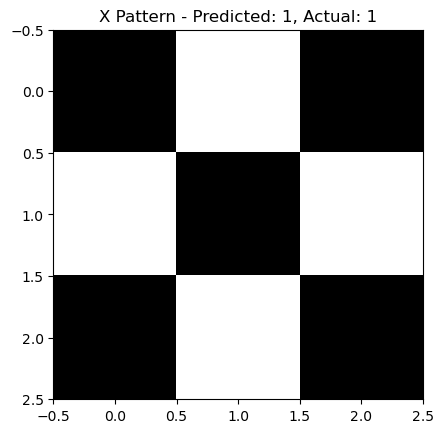

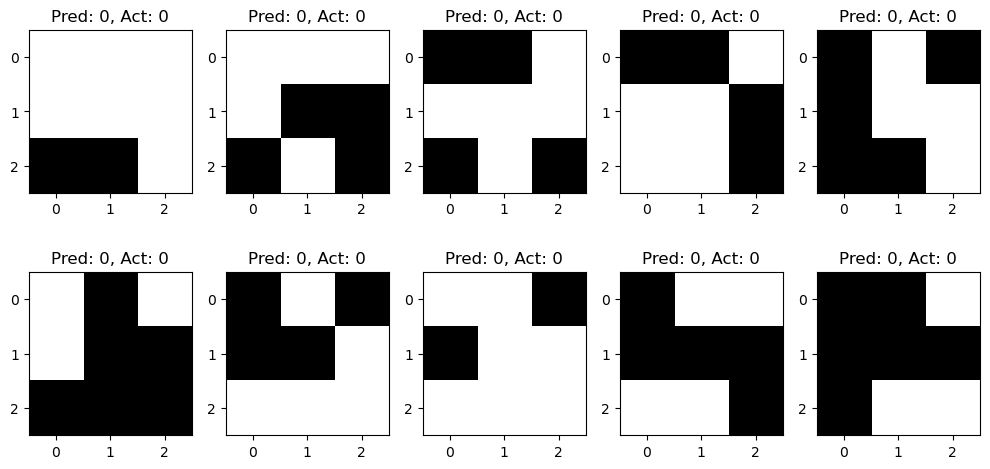

In [38]:
def validate_training(perceptron, dataset):
   
    x_pattern = [0, 1, 0, 1, 0, 1, 0, 1, 0]
    plt.imshow(np.array(x_pattern).reshape(3, 3) * 256, cmap='gray')
    plt.title(f"X Pattern - Predicted: {perceptron.forward(x_pattern)}, Actual: 1")
    plt.show()

    
    random_choice = np.random.choice(len(dataset), size=10, replace=False)
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for idx, ax in zip(random_choice, axes.flatten()):
        vector, label = dataset[idx]
        ax.imshow(vector.reshape(3, 3) * 256, cmap='gray')
        ax.set_title(f"Pred: {perceptron.forward(vector)}, Act: {label}")
    plt.tight_layout()
    plt.show()

# Validate the training and visualize the results
validate_training(myModel, dataset)

